In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [13]:
# Define paths for your dataset
train_dir = r'/Users/wangzh/Desktop/MyDoc/DaSiShang/MV/MV_Seminar Week 5/data_mv/train'
test_dir = r'/Users/wangzh/Desktop/MyDoc/DaSiShang/MV/MV_Seminar Week 5/data_mv/test'

In [14]:
# Image preprocessing and augmentation
# 面向分类任务的数据集划分
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20, #随机旋转的度数范围[0,180]
    width_shift_range=0.2, #图片可能在左右比例（-0.2,0.2）（百分比）内水平移动
    height_shift_range=0.2, #图片可能在上下比例（-0.2,0.2）（百分比）内水平移动
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here 
    fill_mode='nearest'
)

In [15]:
test_datagen = ImageDataGenerator(rescale=1.0/255)  #用于数据增强。 rescale缩放

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8, #一次训练所抓取的数据样本数量
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [16]:
# Build a neural network model （3层网络）
model = Sequential([ #顺序连接
    Flatten(input_shape = (128, 128, 3)), #Flatten对多维数据的降维函数
    Dense(units=500, activation='relu'), #Dence全连接层，units该层的输出维度或神经元个数
    Dense(units=300, activation='relu'),
    Dense(units=3, activation='softmax')
])


In [17]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 500)               24576500  
                                                                 
 dense_4 (Dense)             (None, 300)               150300    
                                                                 
 dense_5 (Dense)             (None, 3)                 903       
                                                                 
Total params: 24727703 (94.33 MB)
Trainable params: 24727703 (94.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), #optimizer优化器 用于控制梯度裁剪
                             loss='categorical_crossentropy', #损失函数：分类交叉熵
                            metrics=['accuracy']) #matrics评价函数 用于评估当前训练模型的性能(和 损失函数 相似，但结果不会用于训练过程)

In [19]:
# Fit the model for training 
history = model.fit(train_generator, validation_data=validation_generator, epochs=20) #model.fit( ) 在模型中训练一定次数，返回loss和测量指标; epochs训练轮数
tf.config.run_functions_eagerly(True) #tf.function静态图转换器,静态运算图能够导出成GraphDef或者SavedModel格式。作用：使tf.function 的所有调用立即运行，而不是作为跟踪图函数运行，便于调试。

Epoch 1/20
5/5 [==============================] - 2s 346ms/step - loss: 30.4794 - accuracy: 0.4103 - val_loss: 27.7551 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 2s 307ms/step - loss: 22.4076 - accuracy: 0.3590 - val_loss: 14.3049 - val_accuracy: 0.4444
Epoch 3/20
5/5 [==============================] - 2s 316ms/step - loss: 19.8554 - accuracy: 0.3077 - val_loss: 8.5999 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 2s 328ms/step - loss: 8.6506 - accuracy: 0.4103 - val_loss: 4.5715 - val_accuracy: 0.6667
Epoch 5/20
5/5 [==============================] - 1s 287ms/step - loss: 6.9248 - accuracy: 0.3846 - val_loss: 4.8408 - val_accuracy: 0.5556
Epoch 6/20
5/5 [==============================] - 1s 291ms/step - loss: 5.7551 - accuracy: 0.4103 - val_loss: 2.7310 - val_accuracy: 0.5556
Epoch 7/20
5/5 [==============================] - 2s 308ms/step - loss: 5.9412 - accuracy: 0.3846 - val_loss: 8.4920 - val_accuracy: 0.3333
Epoch 8/20
5/5 

In [25]:
# Save the trained model
model.save('cat_dog_face_model.keras') #路径与原数据集一样

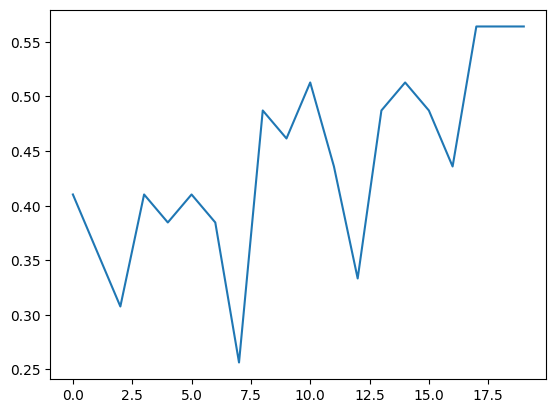

In [26]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['accuracy'])

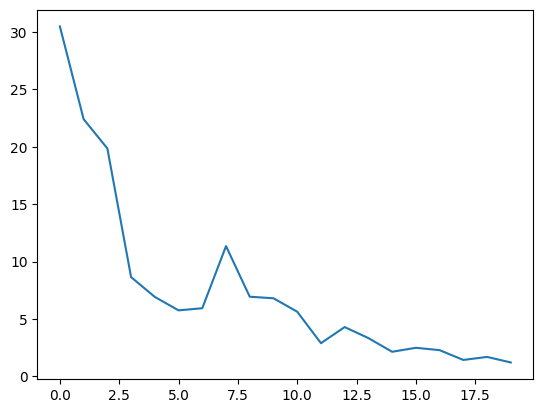

In [27]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'])

In [28]:
# Load the trained model
model = load_model('cat_dog_face_model.keras')  # Replace with the path to your trained model file


In [29]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data



3/3 [==============================] - 0s 19ms/step


/Users/wangzh/anaconda3/envs/tensorflow1/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


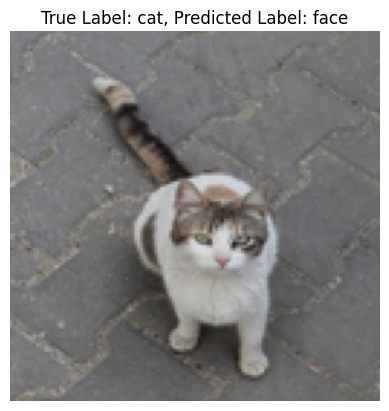

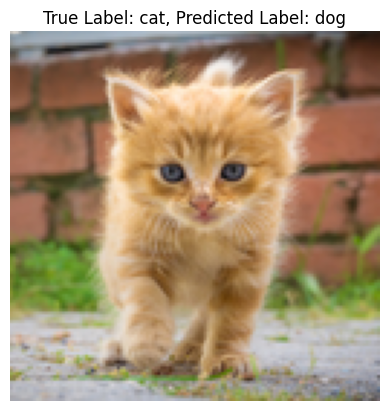

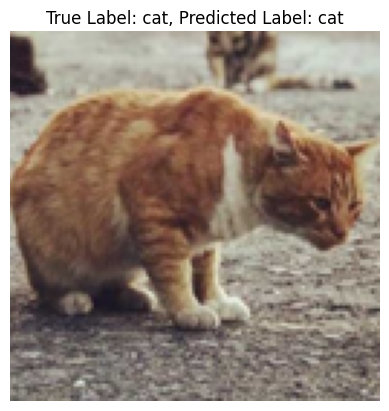

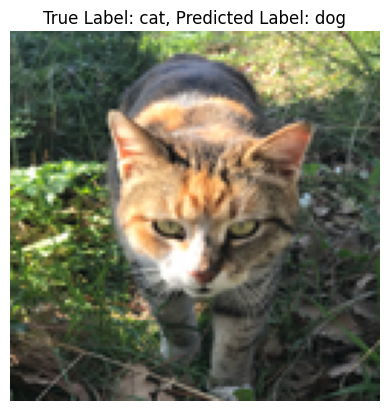

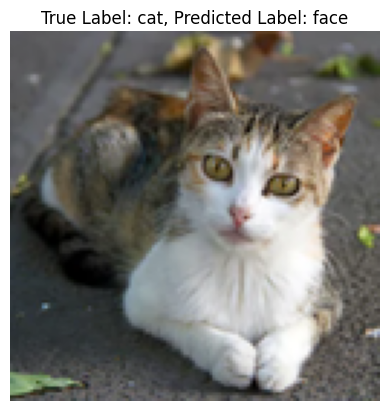

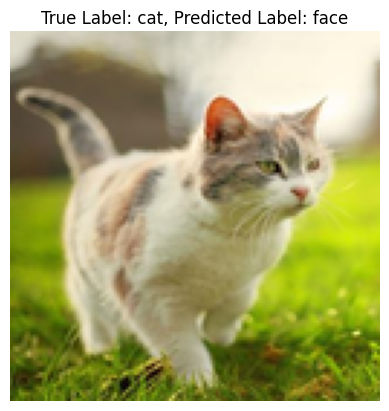

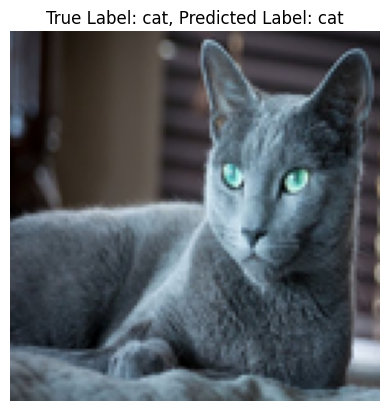

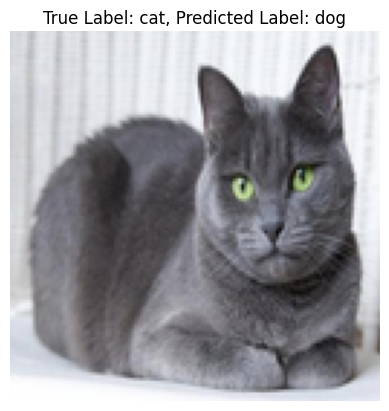

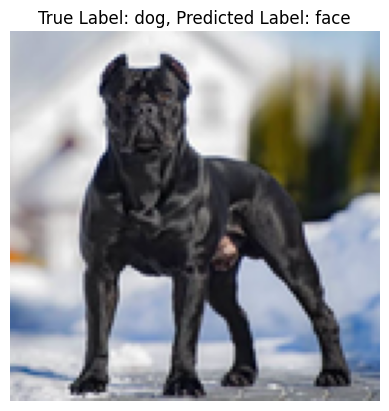

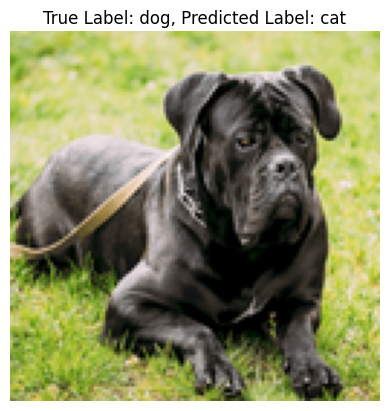

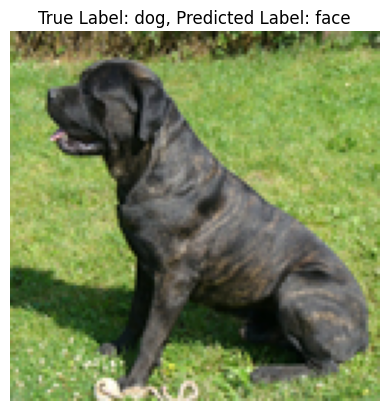

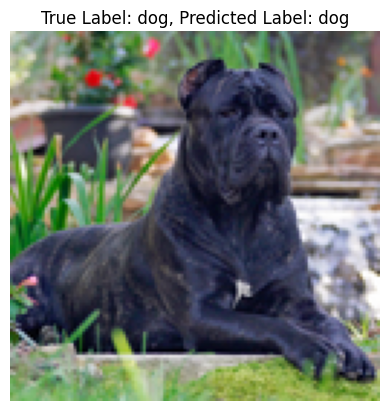

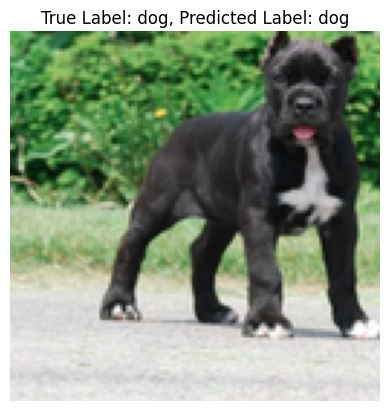

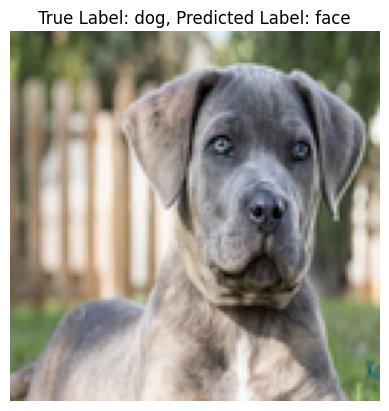

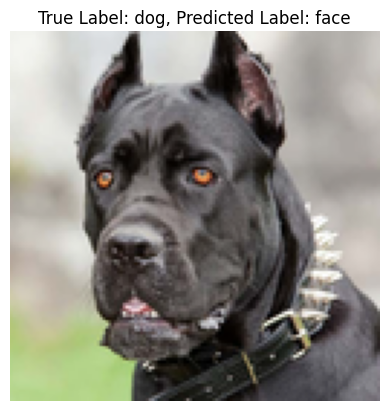

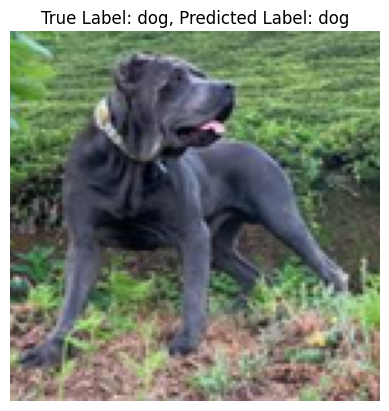

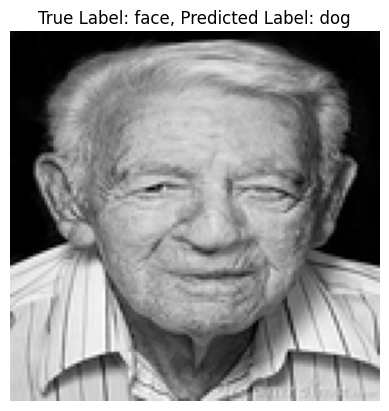

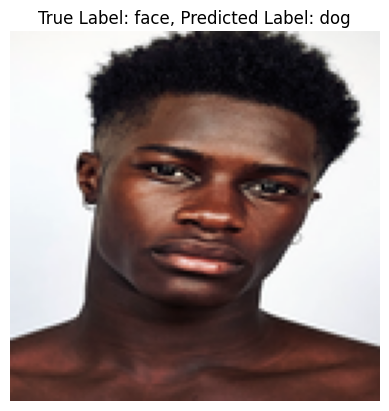

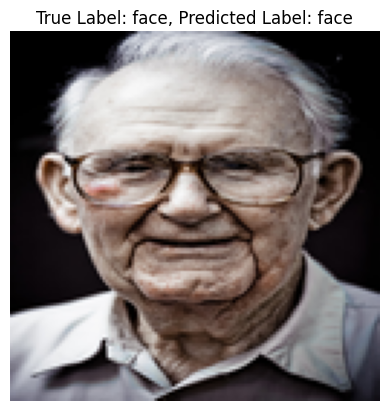

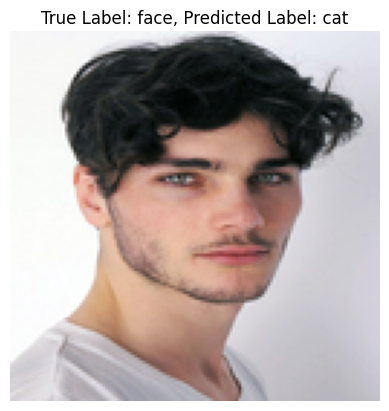

In [30]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 20 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
